# Target 

    This is the stange where we want to freez our architecture and move with introducing some other enhancements, we will start with LR schedulers, the goal is to find the right LR scheduler and boost the accuracy 

# Result  

    we are able to get 99.16% accuracy, since we were playing with learning rate, making dropout as 0 helped us to train the model, all though the model is not overiffing at all, we are not able to see the bosst what we were expecting, thus we will not go with this LR scheduler

# Ananlysis  
    1. Introducing LR scheduler helps model to learn on different learning rates , thus better accuracy, 
    2. Choosing the right LR scheduler is also a important task, since we introduce lot of things in our network we need to find the optimal LR scheduler for the job
    3. In the current code we are using OneCycleLR, which updates learning rate throughout the epoch with every single batch is passed 
    4. According to the documentation and sources it is one of the best but seems like it is introducing over regularization in our case, so either we need to go back change our architecture or we need to drop it, since The StepLR is giving us results we can go with it 
             

CODE BLOCK: 1

In [1]:
# Initialized Logger
import torch
import torch.optim as optim
from torchvision import datasets
from torchsummary import summary
from model import Net
from utils import data_transformation,get_device, \
                  fit_model, plot_accuracy_report, \
                  show_random_results, plot_misclassified, \
                  calculate_accuracy_per_class

CODE BLOCK: 2

In [2]:
# CUDA?
device = get_device()
print("Available Device :: ", device)

INFO:utils:device: cuda


Available Device ::  cuda


CODE BLOCK: 3

In [3]:
transformation_matrix = {
                         "mean_of_data":(0.1307,),
                         "std_of_data": (0.3081,)
                         }

dataloader_kwargs = {'batch_size': 64, 'shuffle': True, 'num_workers': 1, 'pin_memory': True}


train_transforms, test_transforms = data_transformation(transformation_matrix)
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

train_loader = torch.utils.data.DataLoader(train_data, **dataloader_kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **dataloader_kwargs)

INFO:utils:transformation Details ::: 


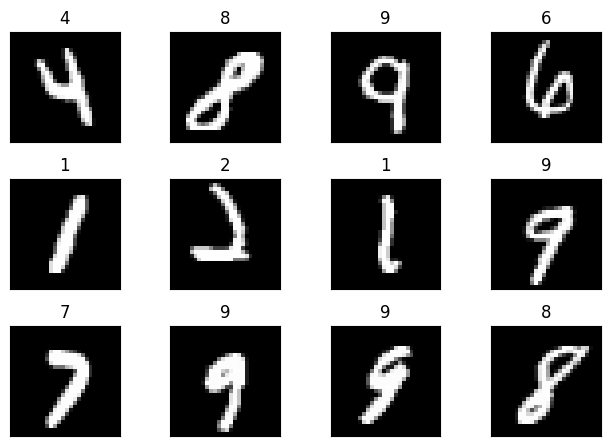

In [4]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [5]:
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 26, 26]              36
              ReLU-2            [-1, 4, 26, 26]               0
       BatchNorm2d-3            [-1, 4, 26, 26]               8
           Dropout-4            [-1, 4, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             360
              ReLU-6           [-1, 10, 24, 24]               0
       BatchNorm2d-7           [-1, 10, 24, 24]              20
           Dropout-8           [-1, 10, 24, 24]               0
         MaxPool2d-9           [-1, 10, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]              80
             ReLU-11            [-1, 8, 12, 12]               0
      BatchNorm2d-12            [-1, 8, 12, 12]              16
          Dropout-13            [-1, 8, 12, 12]               0
           Conv2d-14            [-1, 4,

In [6]:
training_parameters = {"learning_rate":0.017,
                       "momentum":0.9,
                       "step_size":6,
                       "gamma":0.3,
                       "max_lr":0.017,
                       "num_epochs":15
                       }
train_losses, test_losses, train_acc, test_acc = fit_model(model,training_parameters,train_loader,test_loader,device)

Adjusting learning rate of group 0 to 6.8000e-04.
Epoch 1


Train: Loss=0.1654 Batch_id=937 Accuracy=80.39: 100%|██████████| 938/938 [00:29<00:00, 31.76it/s]


Test set: Average loss: 0.1862, Accuracy: 9669/10000 (96.69%)

Adjusting learning rate of group 0 to 6.8000e-04.
Epoch 2


Train: Loss=0.1259 Batch_id=937 Accuracy=97.00: 100%|██████████| 938/938 [00:23<00:00, 40.26it/s]


Test set: Average loss: 0.0910, Accuracy: 9808/10000 (98.08%)

Adjusting learning rate of group 0 to 6.8001e-04.
Epoch 3


Train: Loss=0.0443 Batch_id=937 Accuracy=97.90: 100%|██████████| 938/938 [00:24<00:00, 38.59it/s]


Test set: Average loss: 0.0617, Accuracy: 9855/10000 (98.55%)

Adjusting learning rate of group 0 to 6.8002e-04.
Epoch 4


Train: Loss=0.1178 Batch_id=937 Accuracy=98.21: 100%|██████████| 938/938 [00:23<00:00, 39.23it/s]


Test set: Average loss: 0.0481, Accuracy: 9882/10000 (98.82%)

Adjusting learning rate of group 0 to 6.8004e-04.
Epoch 5


Train: Loss=0.0372 Batch_id=937 Accuracy=98.47: 100%|██████████| 938/938 [00:33<00:00, 27.84it/s]


Test set: Average loss: 0.0427, Accuracy: 9895/10000 (98.95%)

Adjusting learning rate of group 0 to 6.8006e-04.
Epoch 6


Train: Loss=0.0357 Batch_id=937 Accuracy=98.66: 100%|██████████| 938/938 [00:25<00:00, 36.47it/s]


Test set: Average loss: 0.0432, Accuracy: 9884/10000 (98.84%)

Adjusting learning rate of group 0 to 6.8008e-04.
Epoch 7


Train: Loss=0.3499 Batch_id=937 Accuracy=98.79: 100%|██████████| 938/938 [00:24<00:00, 38.29it/s]


Test set: Average loss: 0.0376, Accuracy: 9895/10000 (98.95%)

Adjusting learning rate of group 0 to 6.8011e-04.
Epoch 8


Train: Loss=0.0060 Batch_id=937 Accuracy=98.85: 100%|██████████| 938/938 [00:24<00:00, 38.79it/s]


Test set: Average loss: 0.0351, Accuracy: 9898/10000 (98.98%)

Adjusting learning rate of group 0 to 6.8014e-04.
Epoch 9


Train: Loss=0.0969 Batch_id=937 Accuracy=98.97: 100%|██████████| 938/938 [00:24<00:00, 38.89it/s]


Test set: Average loss: 0.0353, Accuracy: 9898/10000 (98.98%)

Adjusting learning rate of group 0 to 6.8018e-04.
Epoch 10


Train: Loss=0.0039 Batch_id=937 Accuracy=98.97: 100%|██████████| 938/938 [00:24<00:00, 38.86it/s]


Test set: Average loss: 0.0337, Accuracy: 9900/10000 (99.00%)

Adjusting learning rate of group 0 to 6.8023e-04.
Epoch 11


Train: Loss=0.0506 Batch_id=937 Accuracy=99.08: 100%|██████████| 938/938 [00:24<00:00, 38.79it/s]


Test set: Average loss: 0.0351, Accuracy: 9884/10000 (98.84%)

Adjusting learning rate of group 0 to 6.8027e-04.
Epoch 12


Train: Loss=0.0429 Batch_id=937 Accuracy=99.09: 100%|██████████| 938/938 [00:25<00:00, 37.22it/s]


Test set: Average loss: 0.0292, Accuracy: 9915/10000 (99.15%)

Adjusting learning rate of group 0 to 6.8033e-04.
Epoch 13


Train: Loss=0.0134 Batch_id=937 Accuracy=99.18: 100%|██████████| 938/938 [00:24<00:00, 38.47it/s]


Test set: Average loss: 0.0289, Accuracy: 9916/10000 (99.16%)

Adjusting learning rate of group 0 to 6.8038e-04.
Epoch 14


Train: Loss=0.0078 Batch_id=937 Accuracy=99.17: 100%|██████████| 938/938 [00:24<00:00, 38.03it/s]


Test set: Average loss: 0.0270, Accuracy: 9916/10000 (99.16%)

Adjusting learning rate of group 0 to 6.8044e-04.
Epoch 15


Train: Loss=0.0133 Batch_id=937 Accuracy=99.20: 100%|██████████| 938/938 [00:24<00:00, 38.39it/s]


Test set: Average loss: 0.0297, Accuracy: 9905/10000 (99.05%)

Adjusting learning rate of group 0 to 6.8051e-04.


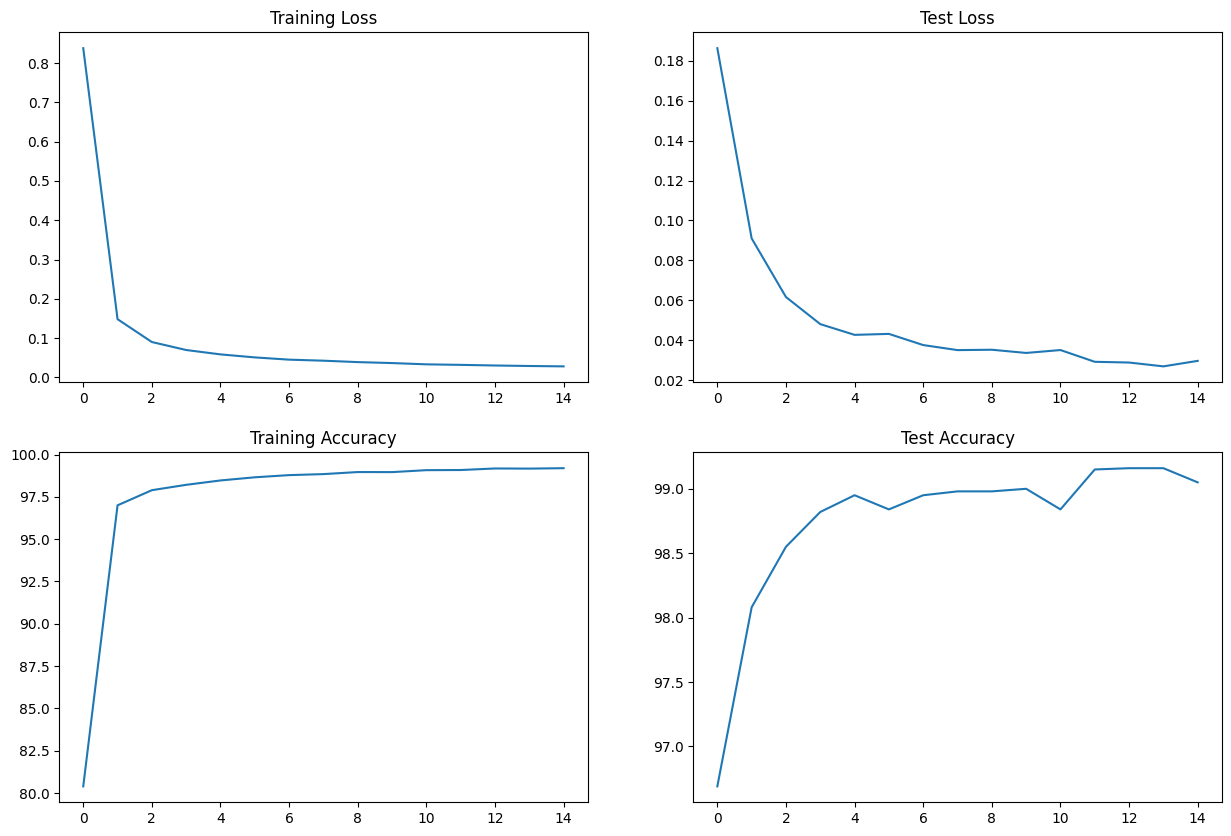

In [7]:
plot_accuracy_report(train_losses, test_losses, train_acc, test_acc)

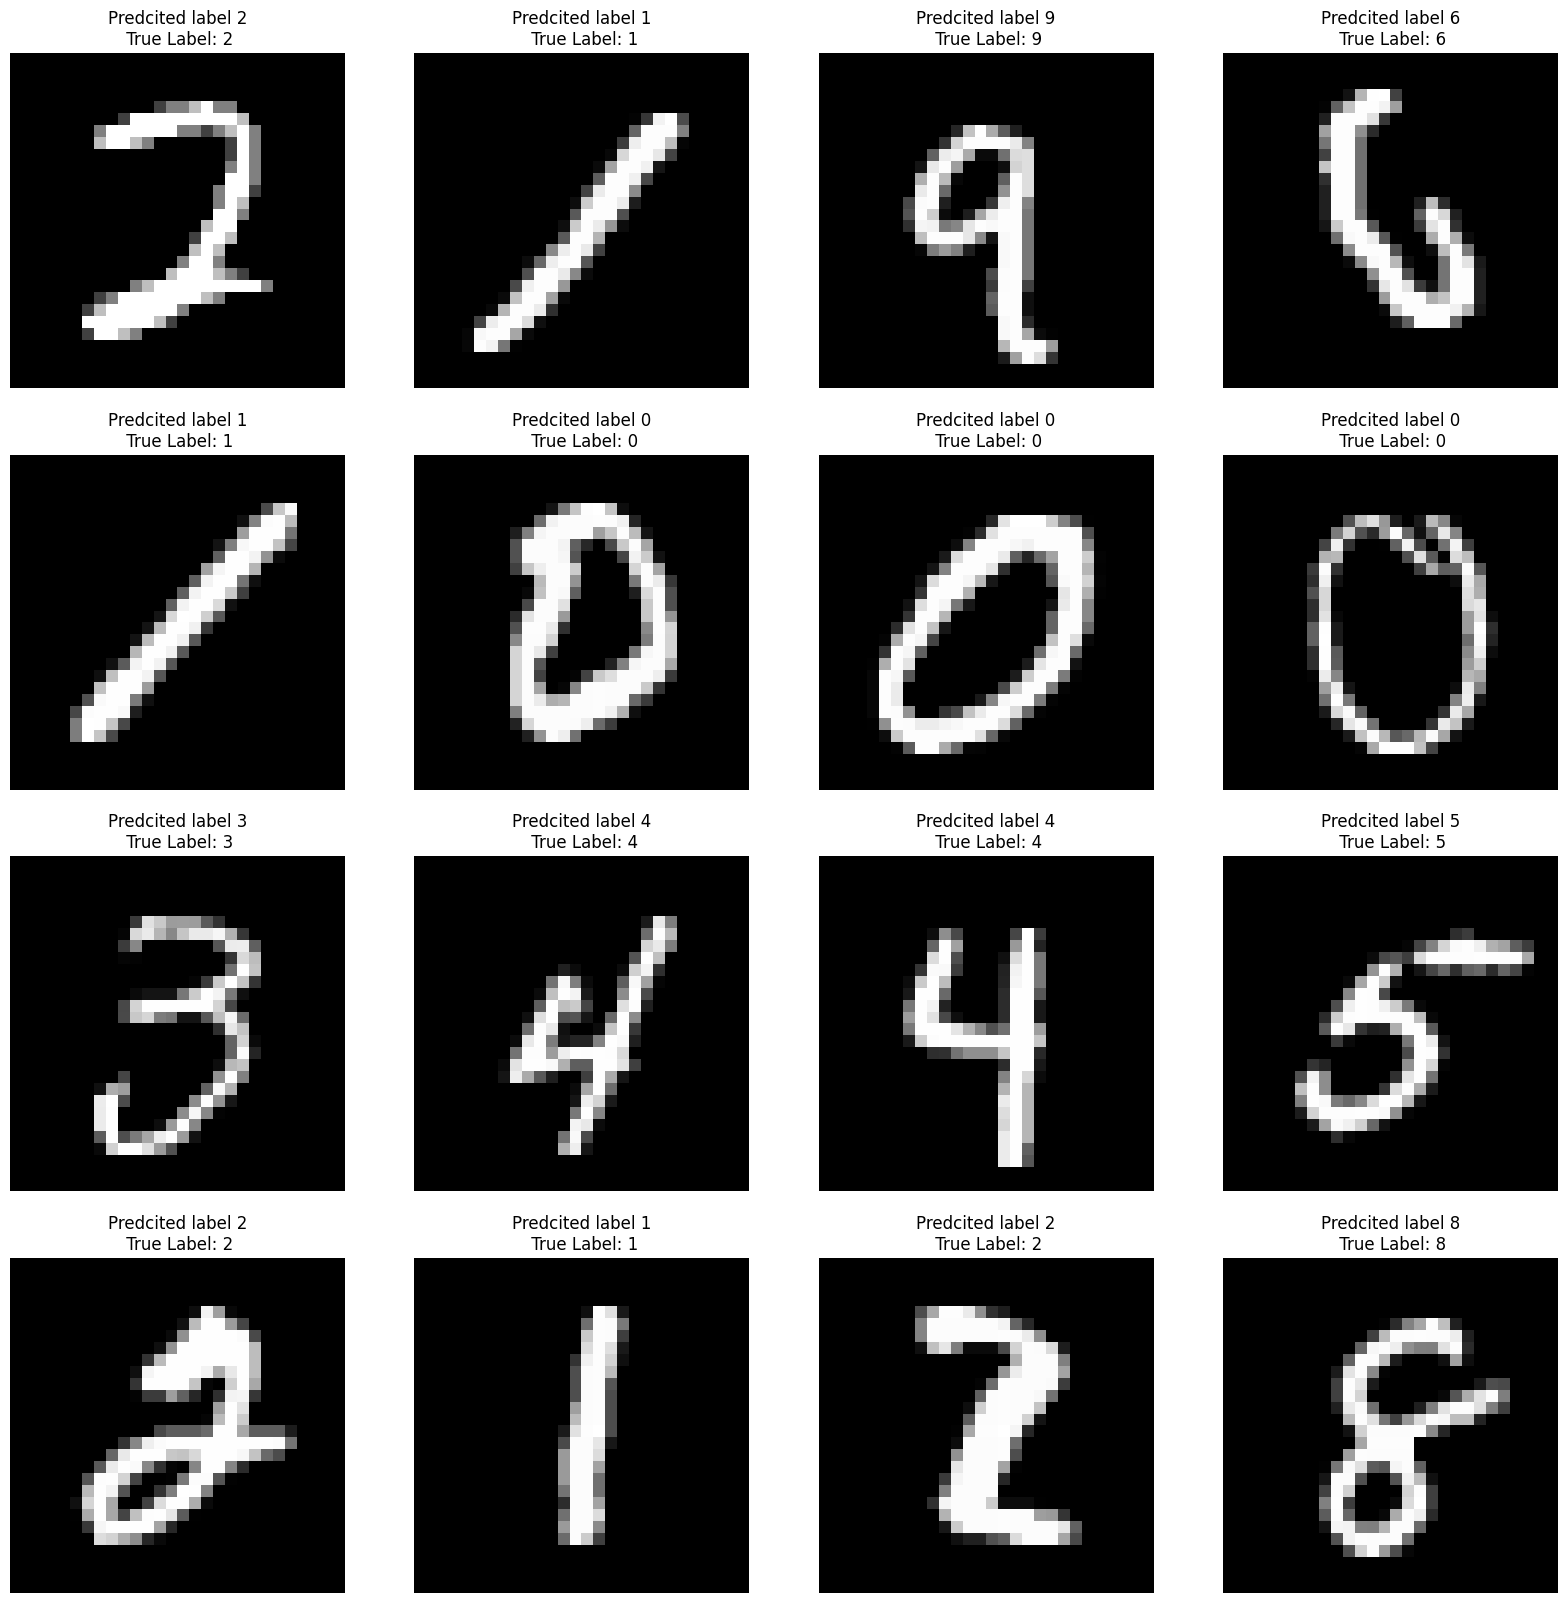

In [8]:
grid_size = (4,4)
show_random_results(test_loader,grid_size,model,device)

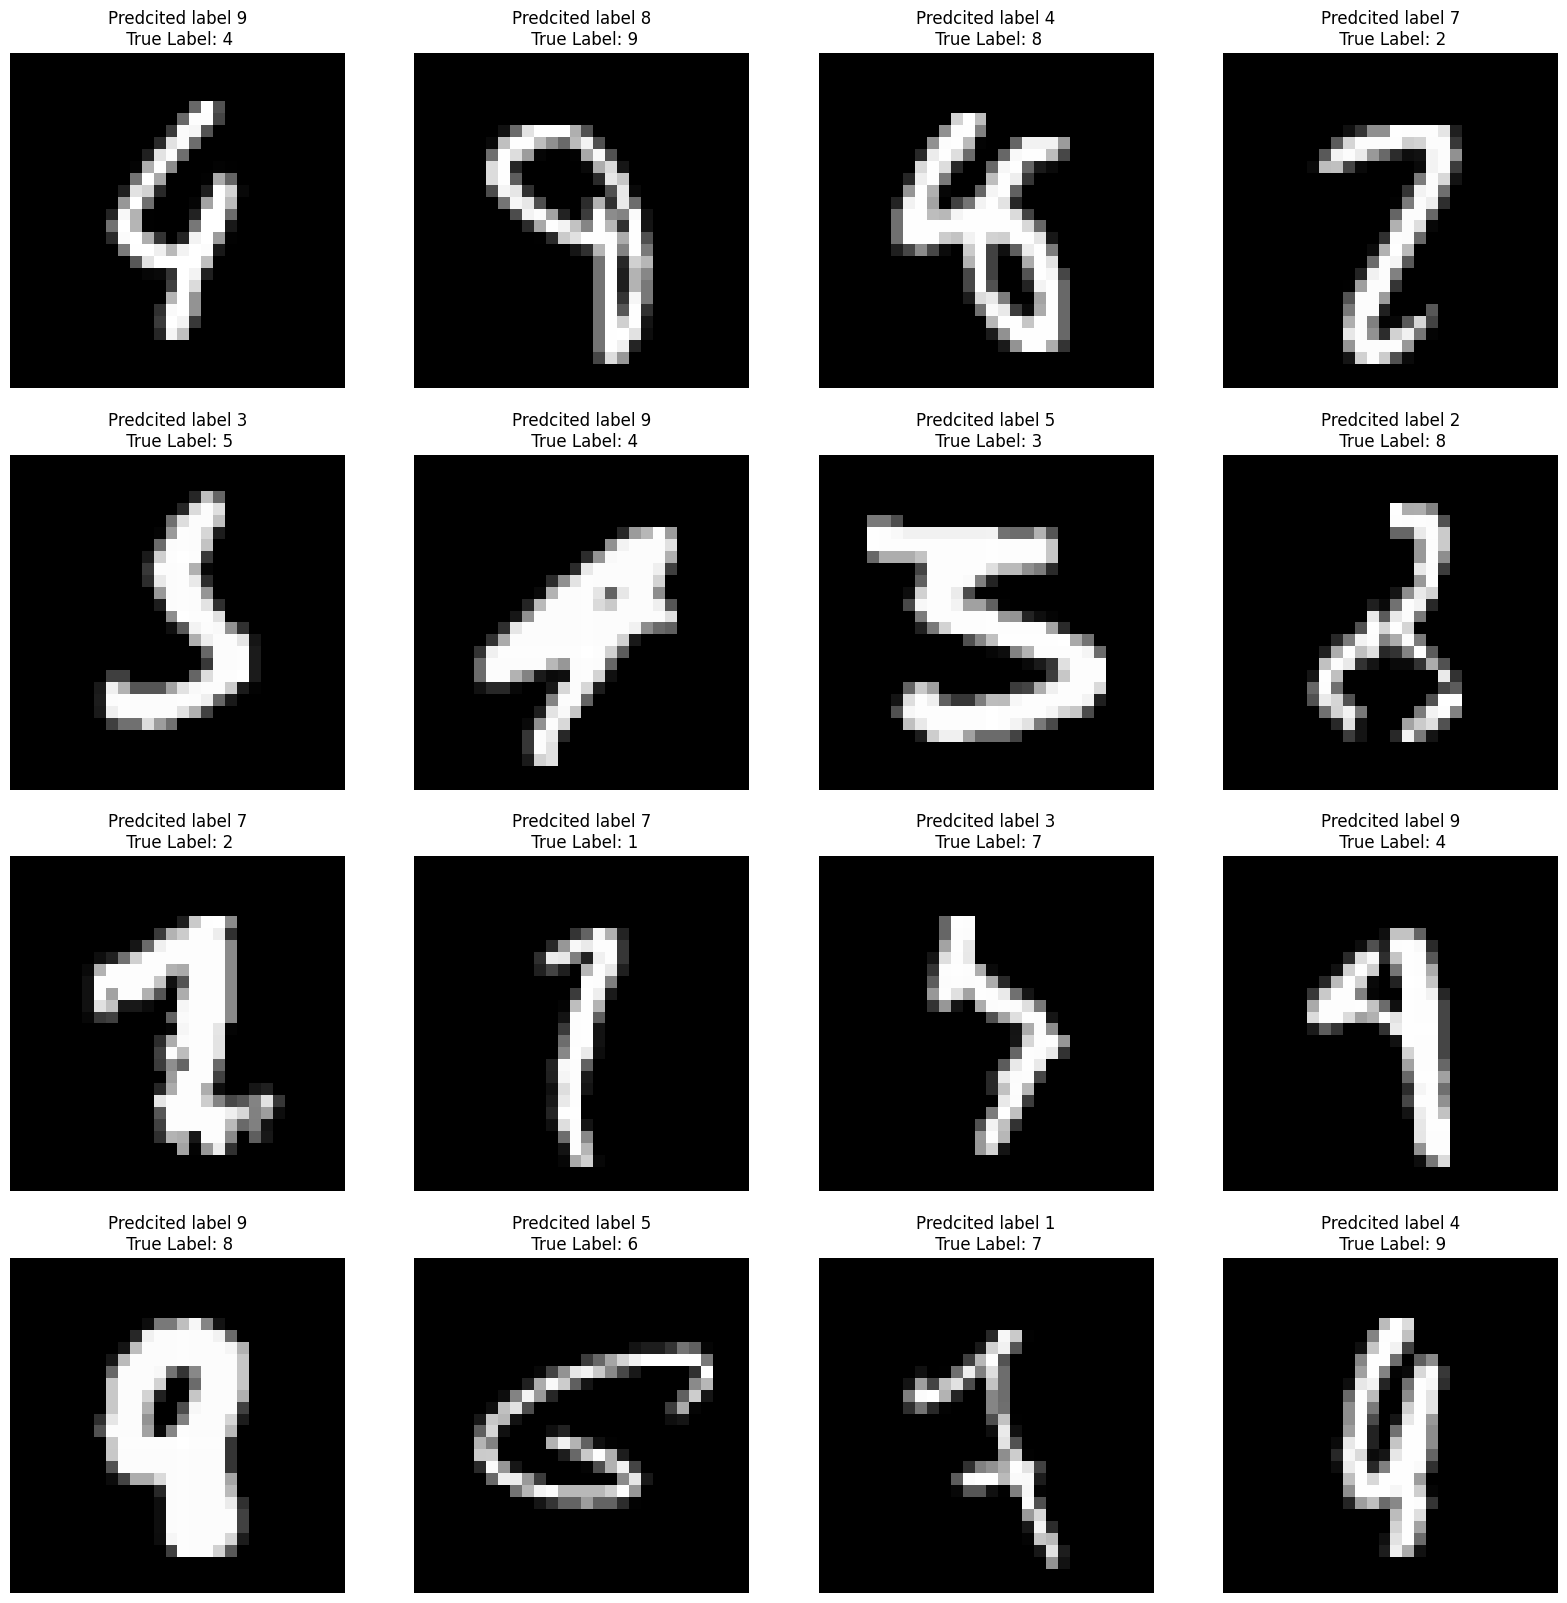

In [9]:
grid_size = (4,4)
plot_misclassified(model,grid_size,test_loader,device)

Accuracy of 0 - zero : 100 %
Accuracy of 1 - one : 100 %
Accuracy of 2 - two : 100 %
Accuracy of 3 - three : 98 %
Accuracy of 4 - four : 100 %
Accuracy of 5 - five : 98 %
Accuracy of 6 - six : 98 %
Accuracy of 7 - seven : 100 %
Accuracy of 8 - eight : 99 %
Accuracy of 9 - nine : 98 %


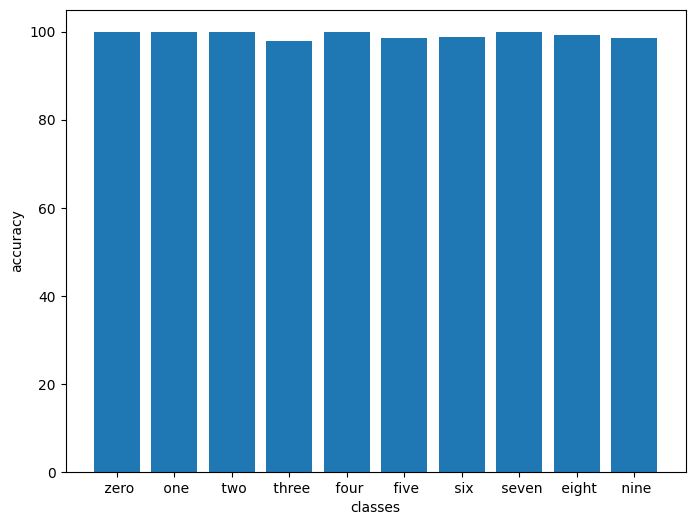

In [10]:
calculate_accuracy_per_class(model,device,test_loader,test_data)